In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem as ch
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import pickle

RDKit WARNING: [14:17:50] Enabling RDKit 2019.09.3 jupyter extensions


In [ ]:
Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(LR_Model, file)
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

In [ ]:
import os
os.system('java -jar PaDEL-Descriptor.jar -dir "C:/Users/HP/AZC_Internship/jupyter notebooks/lol" -2d -file "C:/Users/HP/AZC_Internship/jupyter notebooks/trail2.csv" -usefilenameasmolname')

In [ ]:
string = 'java -jar C:\\Users\HP\\PaDEL-Descriptor\\PaDEL-Descriptor.jar -dir "C:/Users/HP/AZC_Internship/jupyter notebooks/lol" -2d -file "C:/Users/HP/AZC_Internship/jupyter notebooks/trail2.csv" -usefilenameasmolname'
cmd_list = string.split(' ')
cmd_list

In [33]:
cmd_list = ['java',
 '-jar',
 'C:\\Users\\HP\\PaDEL-Descriptor\\PaDEL-Descriptor.jar',
 '-dir',
 'C:\\Users\\HP/AZC_Internship/jupyter notebooks/lol',
 '-2d',
 '-file',
 'C:/Users/HP/AZC_Internship/jupyter notebooks/trail2.csv',
'-maxruntime', '3000'
 '-usefilenameasmolname'
 ]
cmd_list

['java',
 '-jar',
 'C:\\Users\\HP\\PaDEL-Descriptor\\PaDEL-Descriptor.jar',
 '-dir',
 'C:\\Users\\HP/AZC_Internship/jupyter notebooks/lol',
 '-2d',
 '-file',
 'C:/Users/HP/AZC_Internship/jupyter notebooks/trail2.csv',
 '-maxruntime',
 '900',
 '-usefilenameasmolname']

In [37]:
import subprocess
out = subprocess.Popen(cmd_list, 
           stdout=subprocess.PIPE, 
           stderr=subprocess.STDOUT)

In [38]:
stdout,stderr = out.communicate()
print(stdout)
print(stderr)

(b'Descriptor calculation completed in 0.788 secs . Average speed: 0.79 s/mol.\r\n', None)
None


In [26]:
stdout = stdout.decode('utf-8')
type(stdout)

str

In [2]:
import pickle
with open('./saved_models/drop1.txt','wb') as fp:
    pickle.dump(bad_cols,fp)
with open('./saved_models/drop1.txt','rb') as fp:
    b = pickle.load(fp)

NameError: name 'bad_cols' is not defined

In [ ]:
b == bad_cols

In [8]:
X = pd.read_csv('./trail2.csv')
with open('./saved_models/drop1.txt','rb') as fp:
    bad_cols = pickle.load(fp)
X.drop(columns=bad_cols,inplace=True)
X.drop(columns='Name',inplace=True)
with open('./saved_models/scaler.pkl','rb') as fp:
    scaler = pickle.load(fp)
X2 = scaler.transform(X)
X = pd.DataFrame(data=X2,columns=X.columns)
X.head()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,-0.144994,1.843406,0.059879,1.52971,-1.092956,-2.509253,-2.374302,-1.060352,-0.883322,-1.117241,...,1.762918,-0.995279,-1.544535,-0.383895,-0.241307,-1.323837,-0.540236,-0.979008,-0.486992,-0.901938


In [11]:
with open('./saved_models/drop2.txt','rb') as fp:
    bad_cols = pickle.load(fp)
X.drop(columns=bad_cols,inplace=True)

In [12]:
X.head()

,nAcid,ALogP,ALogp2,nN,nO,nP,AATS1m,AATS5m,AATS6m,AATS1v,...,SRW4,SRW6,SRW8,SRW10,TSRW,WTPT-2,WTPT-4,WTPT-5,WPATH,XLogP
0,-0.144994,1.843406,0.059879,-1.227463,-0.110849,-0.097607,2.47341,0.568963,2.078253,1.497761,...,-0.896763,-0.743888,-0.673486,-0.644734,-0.650316,-1.544535,-0.241307,-1.323837,-0.540236,-0.486992


In [16]:
with open('./saved_models/pca.pkl','rb') as fp:
    pca = pickle.load(fp)
cols = []
for i in range(pca.n_components):
    cols.append('comp'+str(i+1))
principalComponents= pca.transform(X)
X_red = pd.DataFrame(data=principalComponents, columns=cols)
X_red.head()

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9,comp10,...,comp51,comp52,comp53,comp54,comp55,comp56,comp57,comp58,comp59,comp60
0,-9.106822,8.963985,7.494816,-0.909403,3.096837,-8.911748,-1.978995,12.41061,-0.67315,2.1844,...,4.67498,2.490114,-0.649474,-2.096191,1.755488,2.007437,2.253845,2.086251,1.722187,0.993697


In [18]:
with open('./saved_models/predictor.pkl','rb') as fp:
    pp = pickle.load(fp)
prediction = pp.predict(X_red)

In [19]:
prediction

array([5.88227952])

In [3]:
df = pd.read_excel('C:\\Users\\HP\\AZC_Internship\\Data\\ChemBL\\AKT-binding_simplified.xlsx',sheet_name='Step3')
df.head()

,Sno,ChEMBL_ID,Smiles,Standard_Value,Standard_Units,pChEMBL_Value,Class
0,1,CHEMBL3403664,C[C@H](Nc1ncnc(N)c1C#N)c1nc2ccc(F)cc2c(S(C)(=O...,0.10,nM,10.00,1
1,2,CHEMBL3899716,Cc1cc(-c2cn(CCN3CCC3)c(C3CCN(c4ncnc(N)c4Br)CC3...,0.10,nM,10.00,1
2,3,CHEMBL3966806,CC(C)c1cc(-c2cn(CCN3CCC3)c(C3CCN(c4ncnc(N)c4Br...,0.15,nM,9.82,1
3,4,CHEMBL379300,Cc1n[nH]c2ccc(-c3cncc(OC[C@@H](N)Cc4c[nH]c5ccc...,0.16,nM,9.80,1
4,5,CHEMBL573326,N[C@H](COc1cncc(-c2ccc3c(c2)C(c2ccco2)C(=O)N3)...,0.17,nM,9.77,1


In [5]:
df.drop(columns=['Sno','ChEMBL_ID','Standard_Value','Standard_Units','Class'],inplace=True)

In [7]:
df.head()

,Smiles,pChEMBL_Value
0,C[C@H](Nc1ncnc(N)c1C#N)c1nc2ccc(F)cc2c(S(C)(=O...,10.00
1,Cc1cc(-c2cn(CCN3CCC3)c(C3CCN(c4ncnc(N)c4Br)CC3...,10.00
2,CC(C)c1cc(-c2cn(CCN3CCC3)c(C3CCN(c4ncnc(N)c4Br...,9.82
3,Cc1n[nH]c2ccc(-c3cncc(OC[C@@H](N)Cc4c[nH]c5ccc...,9.80
4,N[C@H](COc1cncc(-c2ccc3c(c2)C(c2ccco2)C(=O)N3)...,9.77


In [19]:
df2 = df.sample(frac=(600/2861))

In [20]:
df2.head()

,Smiles,pChEMBL_Value
919,CCc1c(N)ncnc1N1CCC(c2nc(-c3cncc(Cl)c3)cn2CCN2C...,7.51
1601,Cc1nc(NC(=O)N2CC[C@H](O)[C@H]2C(N)=O)sc1-c1csc...,6.75
2457,CCCN(C)Cc1ccc(-c2nnc3n2-c2cccnc2Nc2ccccc2-3)cc1,5.60
455,C[C@@H]1Cc2ccccc2N1C(=O)Cc1nc(N2CCOCC2)cc(=S)[...,8.10
1224,Cc1nc(N)nc(-c2c(Nc3cc[nH]n3)nc3ccc(-c4cccc(F)c...,7.14


In [21]:
df2.sort_values(by=['pChEMBL_Value'],inplace=False).head()

,Smiles,pChEMBL_Value
2860,CC(=O)NCC(=O)N[C@@H](CCCNC(=N)N)C(=O)N1CCC[C@H...,2.617983
2857,CC(C)[C@H](NC(=O)c1ccc(NC(=O)CCCCNC(=N)N)cc1)C...,2.714443
2845,O=C(CSc1nnc(COc2ccc3c(c2)CCCC3)o1)Nc1nc2ccc(F)...,4.010000
2839,CC(C)[C@H](NC(=O)c1ccc(NC(=N)N)cc1)C(=O)N[C@@H...,4.110000
2837,Cc1cc(/N=N/c2ccc(/N=N/c3ccc(O)c(C(=O)O)c3)cc2)...,4.160000


(array([  2.,   0.,  20.,  49.,  75., 129., 136., 106.,  65.,  18.]),
 array([2.61798296, 3.30318466, 3.98838637, 4.67358807, 5.35878977,
        6.04399148, 6.72919318, 7.41439489, 8.09959659, 8.7847983 ,
        9.47      ]),
 <a list of 10 Patch objects>)

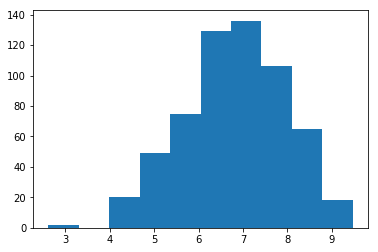

In [22]:
plt.hist(df2['pChEMBL_Value'])

In [23]:
df2.describe()

,pChEMBL_Value
count,600.000000
mean,6.815821
std,1.146750
min,2.617983
25%,6.105000
50%,6.865000
75%,7.660000
max,9.470000


In [24]:
df3 = df2[df2['pChEMBL_Value']<=7.5]

In [26]:
df3.shape

(426, 2)

In [27]:
df3.describe()

,pChEMBL_Value
count,426.000000
mean,6.273245
std,0.869466
min,2.617983
25%,5.735000
50%,6.400000
75%,6.940000
max,7.500000


In [32]:
df3[df3['pChEMBL_Value']>5].to_csv('C:\\Users\\HP\\AZC_Internship\\DeepFMPO\\3.6\\Data\\AKT_pchembl.csv')

In [2]:
X = pd.read_csv('C:\\Users\\HP\\AZC_Internship\\DeepFMPO\\3.6\\Modules\\X.csv')

In [3]:
X.head()

,Name,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,AUTOGEN_generated,0,0.0846,0.007157,105.5086,53.91986,0,0,45,25,...,7.914015,50.669141,2.026766,20.520647,5.533756,11.87465,1785.0,33.0,0.671,128.0


In [6]:
X.fillna(value=0)
X.isna().sum().sum()

811

In [8]:
import pickle as pkl
X= pd.read_csv('no_zeros_no_chembl.csv')
#X.drop(columns=['ChemBLID'],inplace=True)
X.head()
with open('./saved_models/drop2.txt','rb') as f:
    bad_cols2 = pkl.load(f)
bad = bad_cols2
X.drop(columns=bad, inplace = True)

In [10]:
y = X['pChemBL']
X.drop(columns='pChemBL',inplace=True)

In [11]:
list_of_columns = X.columns

In [23]:
with open('./saved_models/good1.xml','w') as f:
    for i in range(len(list_of_columns)):
        f.write('        <Descriptor name="'+str(list_of_columns[i])+'" value="true"/>\n')

In [16]:
from rdkit import Chem
df = pd.read_excel('C:\\Users\\HP\\AZC_Internship\\Data\\ChemBL\\AKT-binding_simplified.xlsx',sheet_name = 'Step3')
mol = Chem.MolFromSmiles(df.iloc[0,2])

In [18]:
print(Chem.MolToMolBlock((mol)),file=open('./saved_models/'+'generated.mol','w'))

In [19]:
X = pd.read_csv('C:\\Users\\HP\\AZC_Internship\\Data\\Descriptor data\\Padel descriptors\\actual_padel_AKT.csv')
X.head()

,Name,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,AUTOGEN_CHEMBL1078983,0,-0.7109,0.505379,70.4932,73.378583,16,18,65,34,...,7.157502,70.514766,2.073964,27.938805,11.267053,16.671753,3404.0,59.0,2.188,184.0
1,AUTOGEN_CHEMBL1079175,0,-1.4578,2.125181,44.0418,64.304653,18,20,52,31,...,7.830281,65.167083,2.102164,17.955201,2.565237,15.389964,2593.0,55.0,6.575,180.0
2,AUTOGEN_CHEMBL1081198,0,0.0748,0.005595,27.2874,69.268860,27,29,57,37,...,8.827511,76.232497,2.060338,31.795843,2.556014,22.098211,4979.0,56.0,5.589,198.0
3,AUTOGEN_CHEMBL1089661,0,-10.0458,100.918098,183.2952,142.418303,6,6,135,64,...,6.678230,125.580825,1.962200,61.611922,20.276064,41.335857,21440.0,92.0,-0.194,302.0
4,AUTOGEN_CHEMBL1090115,0,-1.7897,3.203026,32.3564,58.685481,21,23,47,30,...,8.491716,62.402934,2.080098,16.872064,13.655728,3.216336,2319.0,52.0,4.844,168.0


In [20]:
X.drop(columns='Name',inplace=True)

In [22]:
all_cols = X.columns
with open('./saved_models/good.xml','w') as f:
    for col in all_cols:
        if col in list_of_columns:
            f.write('        <Descriptor name="'+str(col)+'" value="true"/>\n')
        else:
            f.write('        <Descriptor name="'+str(col)+'" value="False"/>\n')

In [ ]:
file_path = "C:\\Users\\HP\\AZC_Internship\\DeepFMPO\\3.6\\descriptors.csv"
mol_folder_path = "./generated_molecules/"
cmd_list = ['java','-jar',Padel_path, '-dir', mol_folder_path, '-2d','-file', file_path,'-maxruntime', '-1']